In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import os
from tqdm import tqdm

# Converting text file into dataframe

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/Project5_Ag_Crop_and_weed_detection/agri_data/data'

In [32]:
data = [os.path.join(path,x) for x in os.listdir(path)]

In [ ]:
images = [data[x] for x in range(len(data)) if data[x].endswith('.jpeg')]

In [ ]:
labels = [data[x] for x in range(len(data)) if data[x].endswith('.txt')]

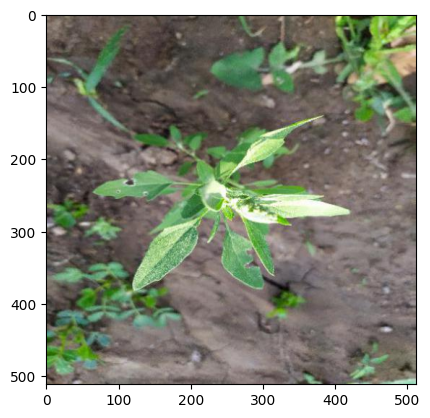

In [ ]:
#checking the conversion is working or not
plt.imshow(cv2.cvtColor(cv2.imread(images[1]),cv2.COLOR_BGR2RGB))

In [ ]:
df = pd.DataFrame(columns=['image_name','object','x_cen','y_cen','w','h'])
i=0
for id in tqdm(images):
    label = open(id[:-5]+'.txt','r')
    a = label.read()
    label.close()
    label = a.split('\n')
    cleaned_label = label[:-1]

    for name in cleaned_label:
        ind_label = name.split(' ')
        df.loc[i,'image_name'] = id[74:]
        df.loc[i,'object'] = int(ind_label[0])
        df.loc[i,'x_cen'] = float(ind_label[1])
        df.loc[i,'y_cen'] = float(ind_label[2])
        df.loc[i,'w'] = float(ind_label[3])
        df.loc[i,'h'] = float(ind_label[4])
        i += 1

100%|██████████| 1300/1300 [00:08<00:00, 158.41it/s]


In [ ]:
df.head()

,image_name,object,x_cen,y_cen,w,h
0,agri_0_6581.jpeg,1,0.505859,0.514648,0.550781,0.509766
1,agri_0_6604.jpeg,1,0.46875,0.513672,0.671875,0.503906
2,agri_0_6605.jpeg,0,0.396484,0.568359,0.789062,0.863281
3,agri_0_6605.jpeg,0,0.75293,0.258789,0.494141,0.513672
4,agri_0_6642.jpeg,0,0.56543,0.527344,0.318359,0.34375


# Converting dataframe into Pascal-voc format

In [ ]:
#column name for pascal-voc dataframe
column_name = ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax']

In [ ]:
pascal_voc = pd.DataFrame(columns=column_name)
for i in tqdm(range(len(df))):

    pascal_voc.loc[i,'filename'] = df.loc[i,'image_name']
    pascal_voc.loc[i,'width'] = 512
    pascal_voc.loc[i,'height']= 512
    if df.loc[i,'object'] == 0:
        pascal_voc.loc[i,'class'] = 'crop'
    else:
        pascal_voc.loc[i,'class'] = 'weed'
    pascal_voc.loc[i,'xmin']  = int((df.loc[i,'x_cen'] - df.loc[i,'w']/2)*512)
    pascal_voc.loc[i,'ymin']  = int((df.loc[i,'y_cen'] - df.loc[i,'h']/2)*512)
    pascal_voc.loc[i,'xmax']  = int((df.loc[i,'x_cen'] + df.loc[i,'w']/2)*512)
    pascal_voc.loc[i,'ymax']  = int((df.loc[i,'y_cen'] + df.loc[i,'h']/2)*512)


100%|██████████| 2072/2072 [00:02<00:00, 910.01it/s]


In [ ]:
pascal_voc

,filename,width,height,class,xmin,ymin,xmax,ymax
0,agri_0_6581.jpeg,512,512,weed,117,132,399,393
1,agri_0_6604.jpeg,512,512,weed,68,134,412,392
2,agri_0_6605.jpeg,512,512,crop,0,69,404,511
3,agri_0_6605.jpeg,512,512,crop,259,0,512,264
4,agri_0_6642.jpeg,512,512,crop,208,182,371,358
...,...,...,...,...,...,...,...,...
2067,agri_0_3233.jpeg,512,512,crop,11,96,473,440
2068,agri_0_3234.jpeg,512,512,weed,266,219,505,506
2069,agri_0_3247.jpeg,512,512,crop,81,40,465,331
2070,agri_0_3247.jpeg,512,512,crop,208,315,333,402


# Visualizing labels

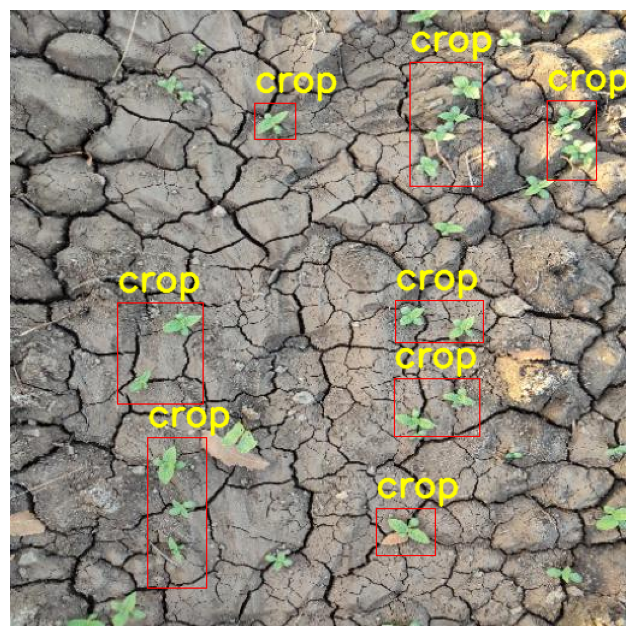

In [ ]:
any_index_number = 55 #change this number for different images
test_img = cv2.cvtColor(cv2.imread(path+'/'+pascal_voc.loc[any_index_number,'filename']),cv2.COLOR_BGR2RGB)
test_df = pascal_voc[pascal_voc['filename']==pascal_voc.loc[any_index_number,'filename']].reset_index(drop=True)
for i in range(len(test_df)):

    rec = cv2.rectangle(test_img, (test_df.loc[i,'xmin'],test_df.loc[i,'ymin']), (test_df.loc[i,'xmax'],test_df.loc[i,'ymax']), (255,0,0), 1, 1)
    text = cv2.putText(rec, test_df.loc[i,'class'], (test_df.loc[i,'xmin'],test_df.loc[i,'ymin']-10), cv2.FONT_HERSHEY_SIMPLEX,1, (255,255,0), 2, cv2.LINE_AA)

plt.figure(figsize=(8,8))
plt.imshow(text)
plt.axis('off')
plt.show()

# Saving label file

In [ ]:
pascal_voc.to_csv('agri_label.csv',index=False)